# 911 Calls

I analyze some 911 call data from [Kaggle](https://www.kaggle.com/mchirico/montcoalert).

The data contains the following fields:

* lat : String variable, Latitude
* lng: String variable, Longitude
* desc: String variable, Description of the Emergency Call
* zip: String variable, Zipcode
* title: String variable, Title
* timeStamp: String variable, YYYY-MM-DD HH:MM:SS
* twp: String variable, Township
* addr: String variable, Address
* e: String variable, Dummy variable (always 1)

## Data and Setup

Import standard libraries for data analysis and visualization.

In [1]:
# standard data analysis libraries
import numpy as np
import pandas as pd

# visualization libraries
import seaborn as sns
import matplotlib.pyplot as plt

# map library
from mpl_toolkits.basemap import Basemap

# style settings
sns.set_style('whitegrid')

# palette
cnt = '#d6e2e2' # continent color
mrk = '#dc6900' # marker color
lac = '#2792a5' # lake color

Read the 911.csv file as a dataframe, check the information and the head.

In [2]:
df = pd.read_csv('./data/911.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   lat        99492 non-null  float64
 1   lng        99492 non-null  float64
 2   desc       99492 non-null  object 
 3   zip        86637 non-null  float64
 4   title      99492 non-null  object 
 5   timeStamp  99492 non-null  object 
 6   twp        99449 non-null  object 
 7   addr       98973 non-null  object 
 8   e          99492 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 6.8+ MB


In [34]:
df.head(5)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,reason,hour,month,day of the week,date
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,Thursday,2015-12-10
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,Thursday,2015-12-10
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire,17,12,Thursday,2015-12-10
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,17,12,Thursday,2015-12-10
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,17,12,Thursday,2015-12-10


Display the top 5 Zipcodes and Townships ("twp") for 911 calls. <br>
Display the number of unique Title codes.

In [4]:
df['zip'].value_counts().head(5)

19401.0    6979
19464.0    6643
19403.0    4854
19446.0    4748
19406.0    3174
Name: zip, dtype: int64

In [5]:
df['twp'].value_counts().head(5)

LOWER MERION    8443
ABINGTON        5977
NORRISTOWN      5890
UPPER MERION    5227
CHELTENHAM      4575
Name: twp, dtype: int64

In [6]:
df['title'].nunique()

110

# Creating new features

In the "title" column there are reasons/departments specified before the title code. 
These are EMS, Fire, and Traffic.  <br>
Create a new column called "reason" that contains this string value.


In [7]:
df['reason'] = df['title'].apply(lambda x : x.split(':')[0])
df.head(2)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,reason
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS


Display the value counts of reasons for a 911 call and make a countplot out of it.

In [8]:
# EMS is the most common reason
df['reason'].value_counts()

EMS        48877
Traffic    35695
Fire       14920
Name: reason, dtype: int64

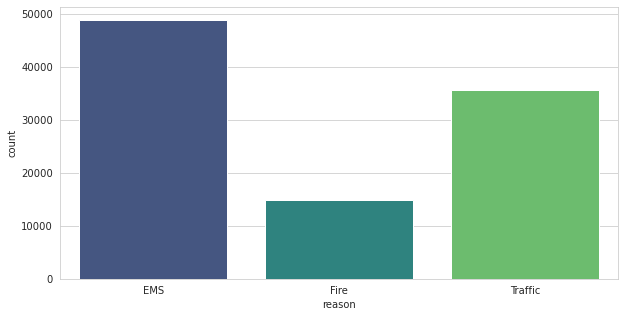

In [9]:
fig1 = plt.figure(figsize = (10,5))

sns.countplot(x = 'reason', data = df, palette = 'viridis')

plt.show()

# Time information

Data in the "timeStamp" column are of type string. <br>
Convert them in DateTime objects.

In [10]:
type(df['timeStamp'].iloc[0])

str

In [11]:
df['timeStamp'] =  pd.to_datetime(df['timeStamp'])
type(df['timeStamp'][0])

pandas._libs.tslibs.timestamps.Timestamp

Create 3 new columns called "hour", "month" and "day of the week" based off of the "timeStamp" column.

In [12]:
df['hour'] = df['timeStamp'].apply(lambda x : x.hour)
df['month'] = df['timeStamp'].apply(lambda x : x.month)
df['day of the week'] = df['timeStamp'].apply(lambda x : x.day_name())

df.head(2)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,reason,hour,month,day of the week
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,Thursday
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,Thursday


Create a countplot of the "day of the week" column, with hue based off of the "reason" column.

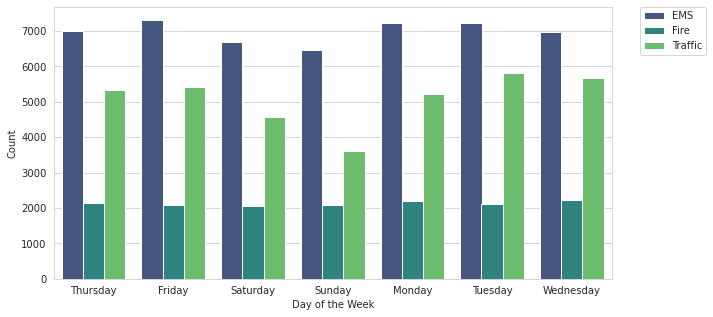

In [13]:
fig2 = plt.figure(figsize = (10,5))

# set the plot
day = sns.countplot(x = 'day of the week', 
                    data = df, 
                    hue = 'reason', 
                    palette = 'viridis')
day.set(xlabel = 'Day of the Week', ylabel = 'Count')

# to set legend out of the plot
plt.legend(bbox_to_anchor = (1.05, 1), loc = 2, borderaxespad = 0.)

plt.show()

Similarly, for the "month" column.

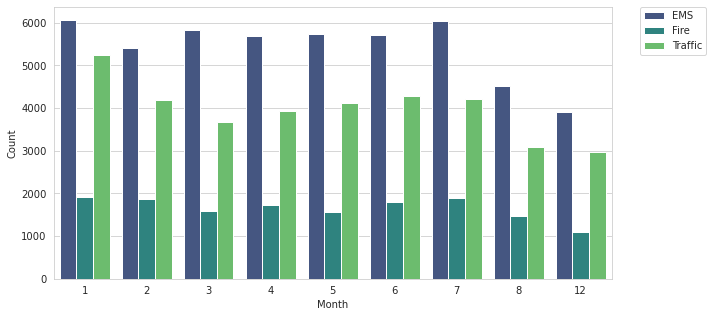

In [14]:
plt.figure(figsize = (10,5))

# set the plot
months = sns.countplot(x = 'month', 
                       data = df, 
                       hue = 'reason', 
                       palette = 'viridis')
months.set(xlabel = 'Month', ylabel = 'Count')

# to set legend out of the plot
plt.legend(bbox_to_anchor = (1.05, 1), loc = 2, borderaxespad = 0.)

plt.show()

Notice that some months are missing in the previous plot. <br>
We fill the missing information via a lineplot.

Aggregate data by creating a groupby object, where the dataframe is grouped by the "month" column.

In [15]:
byMonth = df.groupby(by = 'month').count()
byMonth.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,reason,hour,day of the week
month,,,,,,,,,,,,
1,13205,13205,13205,11527,13205,13205,13203,13096,13205,13205,13205,13205
2,11467,11467,11467,9930,11467,11467,11465,11396,11467,11467,11467,11467
3,11101,11101,11101,9755,11101,11101,11092,11059,11101,11101,11101,11101
4,11326,11326,11326,9895,11326,11326,11323,11283,11326,11326,11326,11326
5,11423,11423,11423,9946,11423,11423,11420,11378,11423,11423,11423,11423


Plot the dataframe indicating the numer of calls per month.

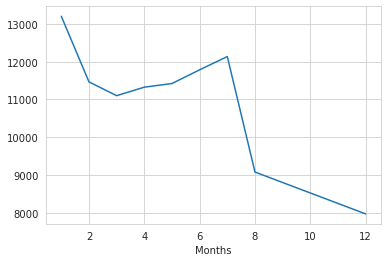

In [16]:
byMonth['e'].plot(xlabel = 'Months')

plt.show()

Use LM-plot to create a linear fit of the number of calls per month.

In [17]:
# reset the index to be able to use lmplot
byMonth.reset_index(inplace = True)

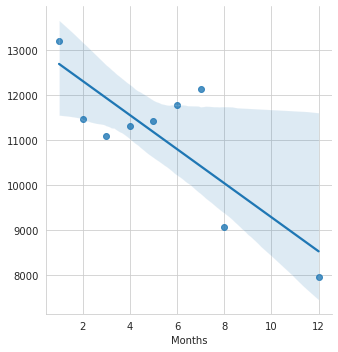

In [18]:
lmplot = sns.lmplot(x = 'month', y = 'e', data = byMonth)
lmplot.set(xlabel = 'Months', ylabel = '')

plt.show()

Create a new column "date" that contains the date from the "timeStamp" column. <br>
Aggregate data by date and create a plot of counts of 911 calls.

In [19]:
df['date'] = df['timeStamp'].apply(lambda x : x.date())
df.head(2)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,reason,hour,month,day of the week,date
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,Thursday,2015-12-10
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,Thursday,2015-12-10


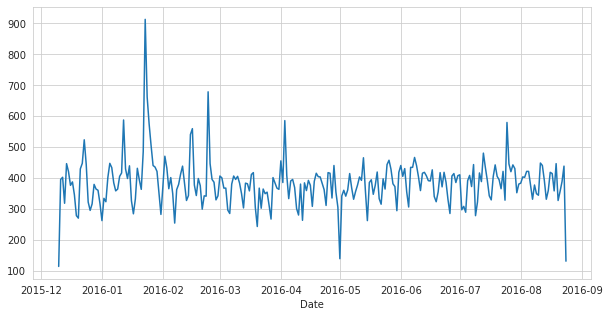

In [20]:
# aggregate data by date
byDate = df.groupby(by = 'date').count()

# create plot
byDate['e'].plot(xlabel = 'Date', 
                 figsize = (10,5),
                 grid = True
                )

plt.show()

Create 3 separate plots with each plot representing a reason for the 911 call (the reason can either be: EMS, Fire, Traffic).

In [21]:
# filtered EMS calls, aggregated by date
ems = df[df['reason'] == 'EMS'].groupby(by = 'date').count()
ems.reset_index(inplace = True)

# filtered Fire calls, aggregated by date
fire = df[df['reason'] == 'Fire'].groupby(by = 'date').count()
fire.reset_index(inplace = True)

# filtered Traffic calls, aggregated by date
traffic = df[df['reason'] == 'Traffic'].groupby(by = 'date').count()
traffic.reset_index(inplace = True)

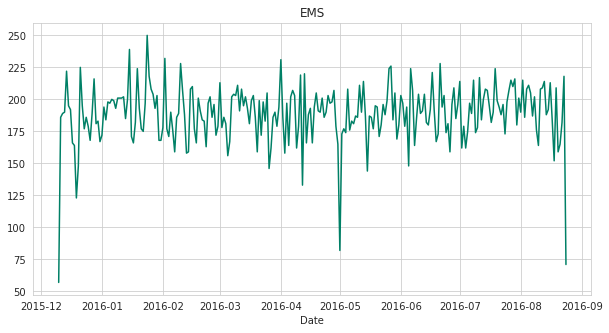

In [22]:
ems.plot(x = 'date', 
         y ='e',
         xlabel = 'Date',
         figsize = (10,5),
         title = 'EMS',
         cmap = 'summer',
         legend = False
         )

plt.show()

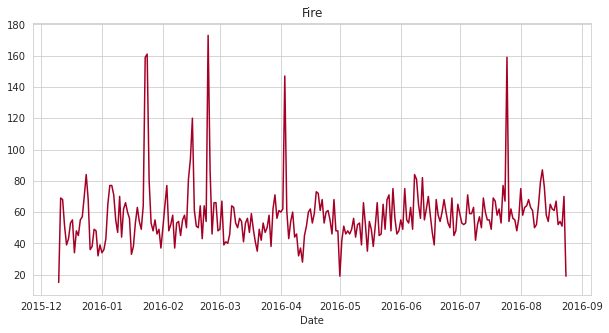

In [23]:
fire.plot(x = 'date',
          y = 'e',
          xlabel = 'Date',
          figsize = (10,5),
          title = 'Fire',
          cmap = 'RdYlGn',
          legend = False
          )

plt.show()

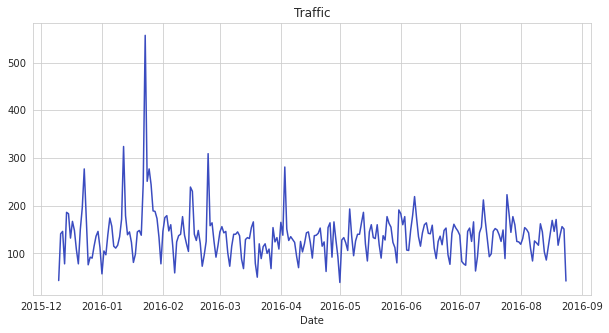

In [24]:
traffic.plot(x = 'date', 
             y = 'e',
             xlabel = 'Date', 
             figsize = (10,5),
             title = 'Traffic',
             cmap = 'coolwarm',
             legend = False
             )

plt.show()

## Heatmaps

We create heatmaps. <br>
First,  we restructure the dataframe so that the columns become the Hours and the index becomes the Day of the Week.

In [25]:
aggr_day = df.pivot_table(index = 'day of the week', 
                      columns = 'hour', 
                      values = 'e', 
                      aggfunc = sum
                     )
aggr_day.head(7)

hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
day of the week,,,,,,,,,,,,,,,,,,,,,
Friday,275,235,191,175,201,194,372,598,742,752,...,932,980,1039,980,820,696,667,559,514,474
Monday,282,221,201,194,204,267,397,653,819,786,...,869,913,989,997,885,746,613,497,472,325
Saturday,375,301,263,260,224,231,257,391,459,640,...,789,796,848,757,778,696,628,572,506,467
Sunday,383,306,286,268,242,240,300,402,483,620,...,684,691,663,714,670,655,537,461,415,330
Thursday,278,202,233,159,182,203,362,570,777,828,...,876,969,935,1013,810,698,617,553,424,354
Tuesday,269,240,186,170,209,239,415,655,889,880,...,943,938,1026,1019,905,731,647,571,462,274
Wednesday,250,216,189,209,156,255,410,701,875,808,...,904,867,990,1037,894,686,668,575,490,335


Heatmap and clustermap of the aggregated dataframe.

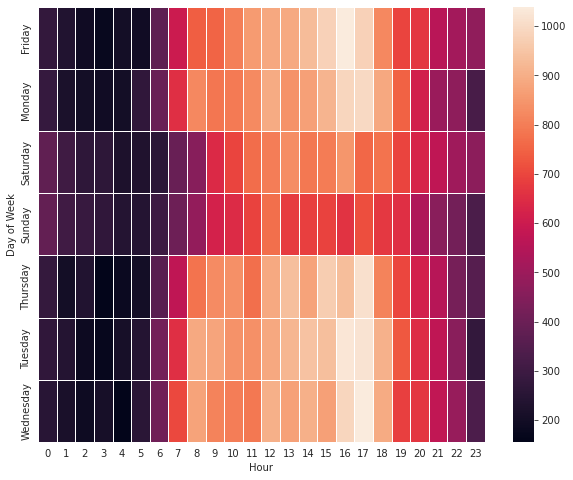

In [26]:
plt.figure(figsize = (10, 8))

heat = sns.heatmap(data = aggr_day, 
                   annot = False, 
                   linewidths = 0.5)
heat.set(xlabel = 'Hour', ylabel = 'Day of Week')

plt.show()

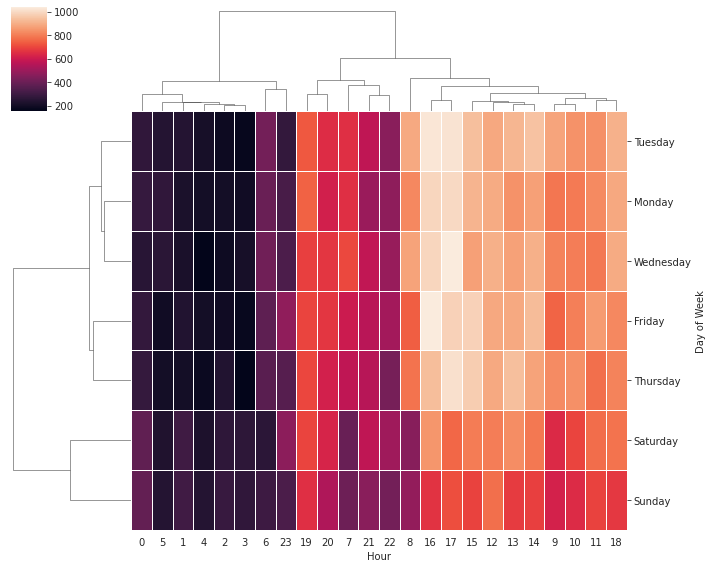

In [27]:
cl = sns.clustermap(data = aggr_day, 
                   figsize = (10,8), 
                   linewidths = 0.5)
cl.ax_heatmap.yaxis.axes.set(xlabel = 'Hour', ylabel = 'Day of Week')

plt.show()

Now, we restructure the dataframe so that the columns become the Months and the index becomes the Day of the Week.

In [28]:
aggr_month = df.pivot_table(index = 'day of the week', 
                      columns = 'month', 
                      values = 'e', 
                      aggfunc = sum
                     )
aggr_month.head()

month,1,2,3,4,5,6,7,8,12
day of the week,,,,,,,,,
Friday,1970,1581,1525,1958,1730,1649,2045,1310,1065
Monday,1727,1964,1535,1598,1779,1617,1692,1511,1257
Saturday,2291,1441,1266,1734,1444,1388,1695,1099,978
Sunday,1960,1229,1102,1488,1424,1333,1672,1021,907
Thursday,1584,1596,1900,1601,1590,2065,1646,1230,1266


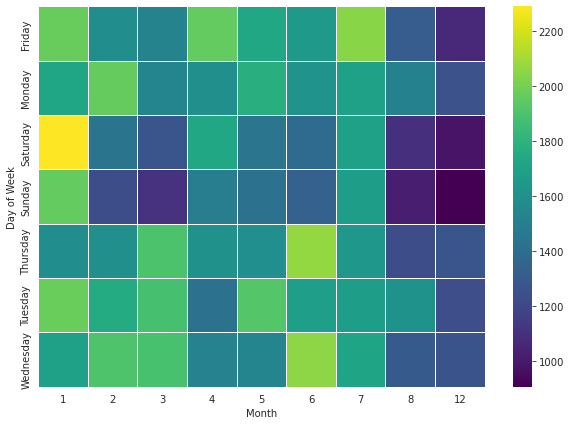

In [29]:
plt.figure(figsize = (10, 7))

heat = sns.heatmap(data = aggr_month, 
                   annot = False, 
                   cmap = 'viridis', 
                   linewidths = 0.5)
heat.set(xlabel = 'Month', ylabel = 'Day of Week')

plt.show()

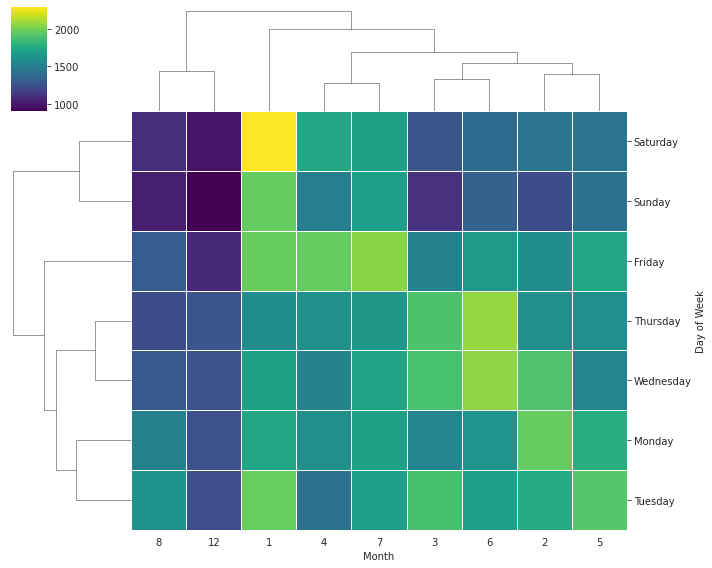

In [30]:
cl =sns.clustermap(data = aggr_month, 
                   figsize = (10,8), 
                   cmap = 'viridis', 
                   linewidths = 0.5)

# change axes labels
cl.ax_heatmap.yaxis.axes.set(xlabel = 'Month', ylabel = 'Day of Week')

plt.show()

## Location

Scatterplot of geographical coordinates of 911 calls, with zoom on the most dense area.

In [31]:
# set list of latitudes and longitudes
lats = list(df['lat'])
lons = list(df['lng'])

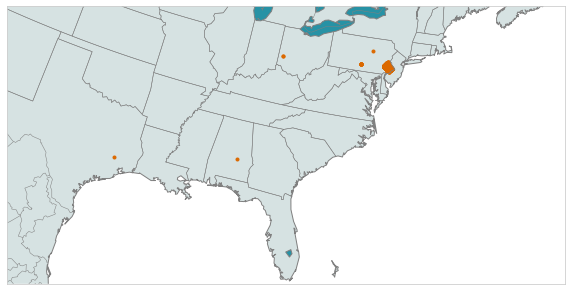

In [32]:
plt.figure(figsize = (10,10))

# define the map
m = Basemap(
    llcrnrlon = -100.,
    llcrnrlat = 20.,
    urcrnrlon = -60.,
    urcrnrlat = 45.,
    projection = 'lcc',
    lat_1 = 20.,
    lat_2 = 40.,
    lon_0 = -60.,
    resolution = 'l',
)

# draw borders and fill with colors
m.drawcoastlines(color = 'grey')
m.drawcountries(color = 'grey')
m.drawstates(color = 'grey')
m.fillcontinents(color = cnt, lake_color = lac)

# mark coordinates
x, y = m(lons, lats)
m.scatter(x, y, marker = '.', color = mrk)

plt.show()

Zoom detail of the scatterplot.

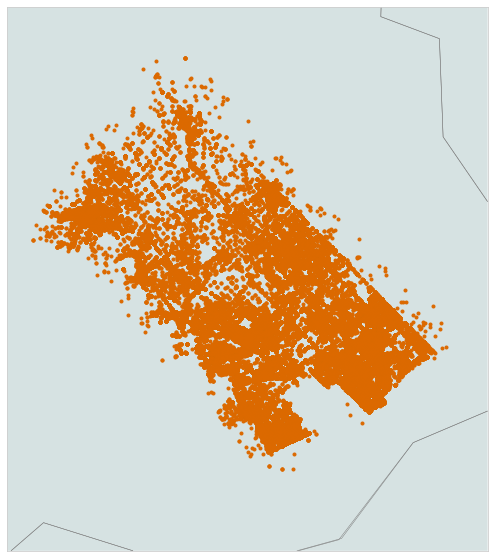

In [33]:
plt.figure(figsize = (10,10))

# define the map (zoom detail)
m = Basemap(
    llcrnrlat = 39.8,
    urcrnrlat = 40.6,
    llcrnrlon = -75.7,
    urcrnrlon = -75,
    projection = 'lcc',
    lat_1 = 20.,
    lat_2 = 40.,
    lon_0 = -60.,
    resolution = 'l',
)

# draw borders and fill with colors
m.drawcoastlines(color = 'grey')
m.drawcountries(color = 'grey')
m.drawstates(color = 'grey')
m.fillcontinents(color =  cnt, lake_color = lac)

# mark coordinates
x, y = m(lons, lats)
m.scatter(x, y, marker = '.', color = mrk)

plt.show()